(a) Loaded dataUse the pd.read_csv() function to read the data into Python.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

college = pd.read_csv('../College.csv')
college.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(b)Look at the data used in the notebook by creating and running
a new cell with just the code college in it.

In [40]:
college2 = pd.read_csv('../College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
college = college3

(c)Use the describe() method of to produce a numerical summary
of the variables in the data set.

In [41]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(d)Use the pd.plotting.scatter_matrix() function to produce a
scatterplot matrix of the first columns [Top10perc, Apps, Enroll].
Recall that you can reference a list C of columns of a data frame
A using A[C].

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

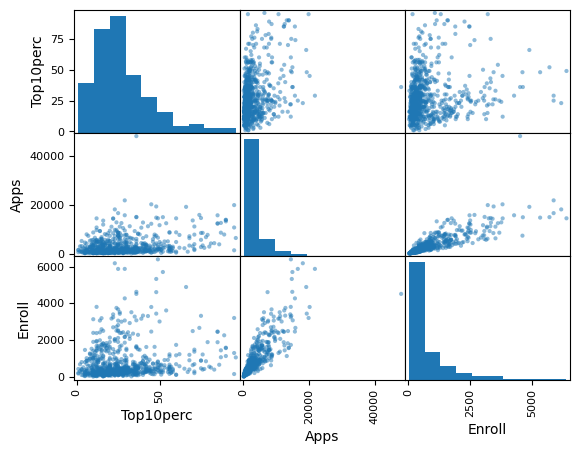

In [42]:
cols = ['Top10perc', 'Apps', 'Enroll']
pd.plotting.scatter_matrix(college[cols])

(e)Use the boxplot() method of college to produce side-by-side
boxplots of Outstate versus Private.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

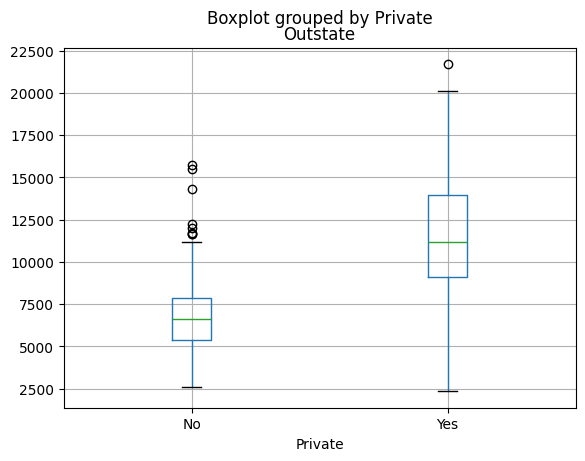

In [43]:
college.boxplot('Outstate', 'Private')

(f)Create a new qualitative variable, called Elite, by binning the
Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high
school classes exceeds 50%.

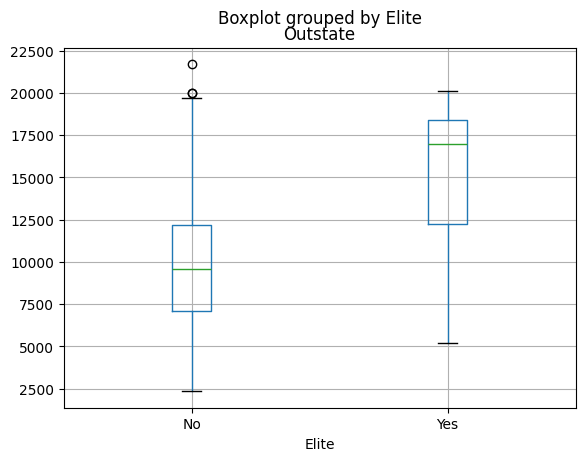

In [44]:
college['Elite'] = pd.cut(college['Top10perc'],[0, 50, 100], labels = ['No','Yes'])
college['Elite'].value_counts()
cols = college.boxplot('Outstate', 'Elite')

(g)Use the plot.hist() method of college to produce some his-
tograms with differing numbers of bins for a few of the quanti-
tative variables. The command plt.subplots(2, 2) may be use-
ful: it will divide the plot window into four regions so that four
plots can be made simultaneously. By changing the arguments
you can divide the screen up in other combinations.

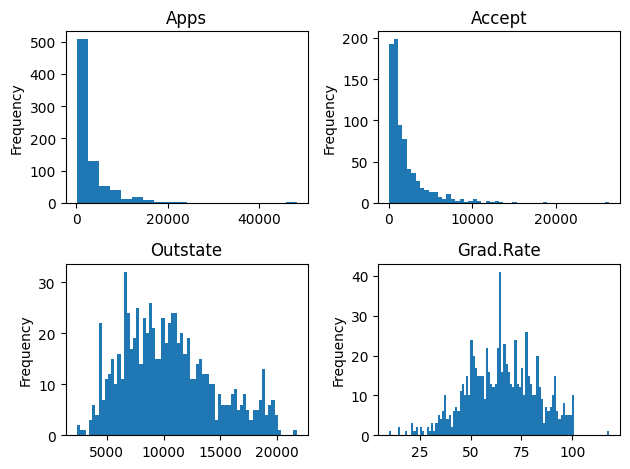

In [62]:
fig, axes = plt.subplots(2,2)
college['Apps'].plot.hist(bins=20, ax=axes[0][0], title='Apps')
college['Accept'].plot.hist(bins=50, ax=axes[0][1], title='Accept')
college['Outstate'].plot.hist(bins=70, ax=axes[1][0], title='Outstate')
college['Grad.Rate'].plot.hist(bins=100, ax=axes[1][1], title='Grad.Rate')
plt.tight_layout()

(h)Continue exploring the data, and provide a brief summary of
what you discover.

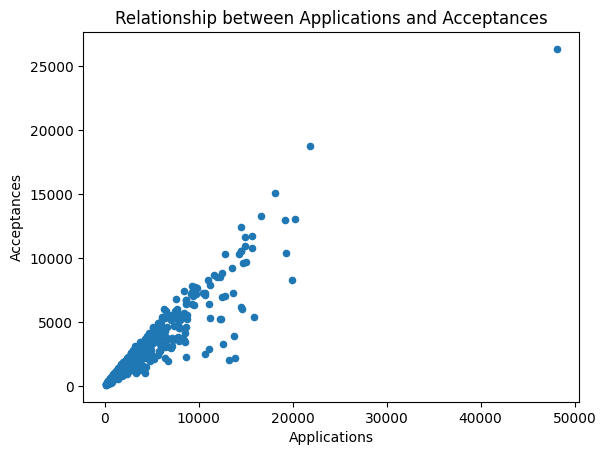

In [69]:
college.plot.scatter(x='Apps', y='Accept')
plt.title("Relationship between Applications and Acceptances")
plt.xlabel("Applications")
plt.ylabel("Acceptances")
plt.show()

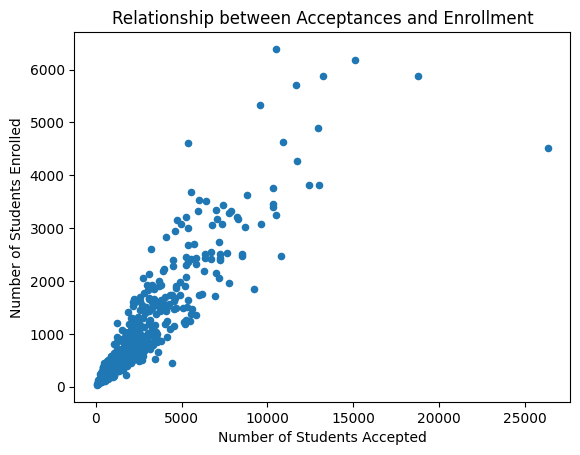

In [70]:
college.plot.scatter(x='Accept', y='Enroll')
plt.title("Relationship between Acceptances and Enrollment")
plt.xlabel("Number of Students Accepted")
plt.ylabel("Number of Students Enrolled")
plt.show()

Brief summary: The figure between application numbers and acceptance numbers shows that the slope is less than 1, since not all applications will be accepted.
Second, there is a strong relationship between acceptance numbers and enrollment numbers, but the points on the figure are more spread out because different schools have different yield rates. Some popular colleges have higher yield rates, while others may need to accept more students to achieve their enrollment.

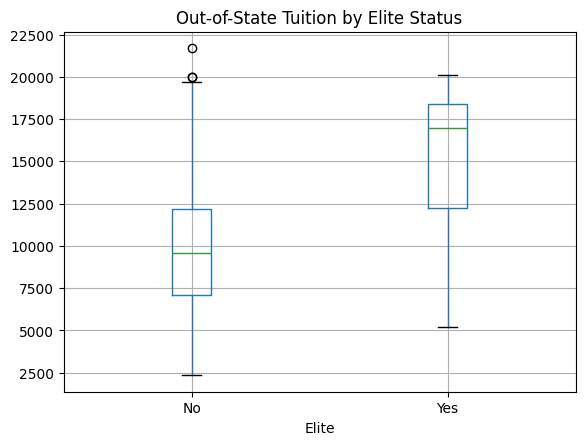

In [72]:
college.boxplot(column='Outstate', by='Elite')
plt.title("Out-of-State Tuition by Elite Status")
plt.suptitle("")
plt.show()

Brief summary: As the boxplot shows, the out-of-state tuition of elite colleges is higher than that of non-elite colleges. Elite colleges have a higher median, around 17,000 USD, and the 75th percentile of non-elite colleges is only approximately near the 25th percentile of elite schools.